# We will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [10]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [12]:
df1=pd.read_csv('Movie_Id_Titles')
df1.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
data=pd.merge(df,df1,on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


# We will plot out the title and the rating columns so as to see which movie got better ratings

In [51]:
ratings=data.groupby('title')['rating'].mean().sort_values(ascending=False).head()
ratings.head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [59]:
ratings=pd.DataFrame(ratings)
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


# We will calculate mean ratings 

In [60]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


# We will count no of ratings

In [61]:
ratings['Total_Ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,Total_Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


# Plot ratings vs no of ratings

<AxesSubplot:>

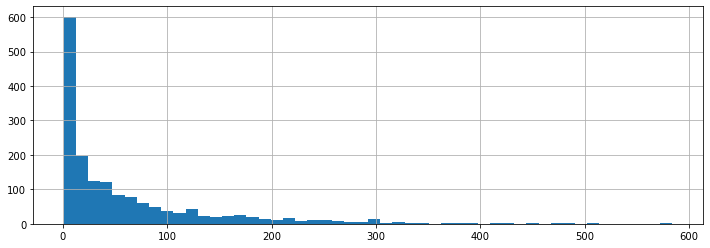

In [62]:
plt.figure(figsize=(12,4))
ratings['Total_Ratings'].hist(bins=50)

# Plot mean Ratings

<AxesSubplot:>

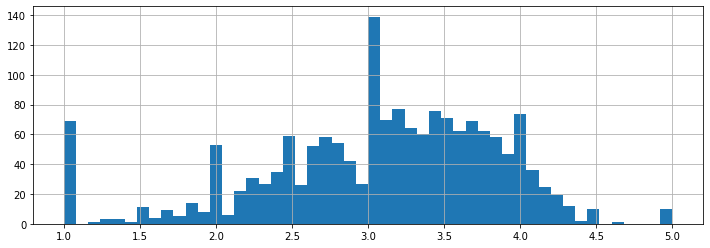

In [63]:
plt.figure(figsize=(12,4))
ratings['rating'].hist(bins=50)

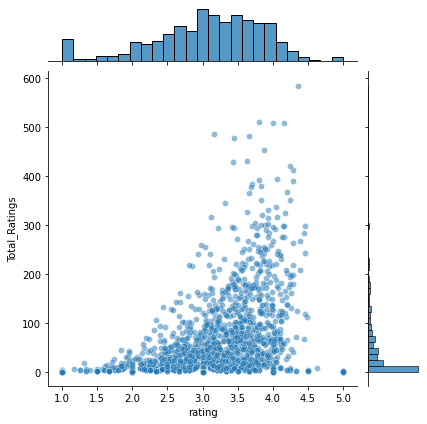

In [64]:
sns.jointplot(x='rating',y='Total_Ratings',data=ratings,alpha=0.5)

# Now We will recommend the similar movies to the movies a user has watched

This will be done by using a userid and rating given by a particular userid

Then we will use correlation to suggest similar movies



In [69]:
movies = data.pivot_table(index='user_id',columns='title',values='rating')
movies.head(20)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# In the above table we notice a lot of NAN Values because all the movies have not been watched by all the users

In [72]:
ratings.sort_values('Total_Ratings',ascending=False).head(10)

,rating,Total_Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [75]:
starwars_ratings = movies['Star Wars (1977)']
starwars_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [84]:
starwars_similarity=movies.corrwith(starwars_ratings)
starwars_similarity.dropna(inplace=True)
starwars_similarity=pd.DataFrame(starwars_similarity,columns=['Correlation'])
starwars_similarity.head()

C:\Users\huzi95s\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\huzi95s\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


# Observing the above dataframe we see that the recommendation system is not working Correctly.

This is because the movie Til There Was You (1997) is an romantic movie and star wars is an action movie. But the relation between them is shown as 87% Similar.

This happens because some movies get lesser user ratings and a single user can watch two different movie and still give a high user rating for both the movies 

We will fix this by removing movies which have less ratings (<150)


In [85]:
starwars_similarity = starwars_similarity.join(ratings['Total_Ratings'])
starwars_similarity.head()

,Correlation,Total_Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [90]:
starwars_similarity[starwars_similarity['Total_Ratings']>150].sort_values('Correlation',ascending=False).head()

,Correlation,Total_Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
"Sting, The (1973)",0.367538,241


In [98]:
starwars_similarity = pd.DataFrame(starwars_similarity,columns=['Correlation'])
starwars_similarity.dropna(inplace=True)
starwars_similarity = starwars_similarity.join(ratings['Total_Ratings'])
starwars_similarity=starwars_similarity[starwars_similarity['Total_Ratings']>150].sort_values('Correlation',ascending=False).head()
starwars_similarity.head()
starwars_similarity.to_csv('C:/Users/huzi95s/Desktop/movie.csv')


# Now we see that The model Works Much Better